# 1. Summary

## blar blar

# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [2]:
# hangel font for both mac, window
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

# 3. Load Data 

In [3]:
# window
# df=pd.read_csv(r"C:\Users\User\Desktop\HANACARD\CardData_new.csv",encoding='cp949')

# mac
df=pd.read_csv(r"/Users/youngzi/Desktop/HANACARD/CardData_new.csv",encoding='cp949')
df

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,Gso9Jlid,2,47,1,20170630,18,0,0,0,0,...,3,3,2,9,5,5,16,0,0,21.Active_연속
299996,EDQYlTTX,2,69,1,20150417,45,0,0,0,0,...,2,2,2,1,0,0,0,12,12,22.Active_간헐
299997,82GwFS1D,1,36,1,20120608,79,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
299998,LUYeNjki,1,48,1,20120508,80,1,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


# 4. Exploratory Data Analysis

# 4.1 Preview Dataset

In [4]:
df.head()

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속


In [5]:
# Check Data Size
print('로우데이터 사이즈 : ',df.shape)

로우데이터 사이즈 :  (300000, 302)


In [6]:
df.columns

Index(['회원번호', '남녀구분코드', '연령', '소지여부_신용', '입회일자_신용', '입회경과개월수_신용', '탈회여부',
       '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM',
       ...
       '캠페인접촉건수_R12M', '캠페인접촉일수_R12M', '캠페인접촉월수_R12M', '접촉후경과월_R12M',
       '보험콜대상월수_R12M', '보험콜대상횟수_R12M', '보험콜통화횟수_R12M', '보험콜배정후경과월_R12M',
       '보험콜통화후경과월_R12M', '고객구분'],
      dtype='object', length=302)

In [7]:
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Columns: 302 entries, 회원번호 to 고객구분
dtypes: int64(290), object(12)
memory usage: 691.2+ MB


In [8]:
# Check statistical values for fields with numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
남녀구분코드,300000.0,1.473560e+00,0.499301,1.0,1.0,1.0,2.0,2.0
연령,300000.0,4.621211e+01,12.087588,19.0,37.0,46.0,54.0,98.0
소지여부_신용,300000.0,9.797400e-01,0.140889,0.0,1.0,1.0,1.0,1.0
입회일자_신용,300000.0,2.011614e+07,74549.268116,10101.0,20090128.0,20140106.0,20170227.0,20180629.0
입회경과개월수_신용,300000.0,8.397931e+01,77.670840,0.0,23.0,60.0,120.0,443.0
...,...,...,...,...,...,...,...,...
보험콜대상월수_R12M,300000.0,1.129337e+00,1.701430,0.0,0.0,0.0,2.0,7.0
보험콜대상횟수_R12M,300000.0,1.131863e+00,1.705944,0.0,0.0,0.0,2.0,7.0
보험콜통화횟수_R12M,300000.0,2.635803e+00,4.848282,0.0,0.0,0.0,4.0,568.0
보험콜배정후경과월_R12M,300000.0,8.231353e+00,4.955658,0.0,2.0,12.0,12.0,12.0


In [9]:
# Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

,count,unique,top,freq
회원번호,300000,300000,BbTe5n7n,1
자격기준,300000,13,06.기업체,79838
자격구분상세,300000,44,08.은행거래_수신평잔,61493
연회비청구구분_B0M,300000,4,4.미청구,274205
거주시도명,300000,16,경기,83450
거주시군구명,300000,210,서구,11222
직장시도명,244335,17,서울,81913
직장시군구명,243838,209,중구,13237
_1순위신용체크구분,300000,2,신용,284204
Life_Stage,300000,7,4.자녀성장기(1),99160


# Observations

### 1. 음수 값 존재 column
이용건수_할부_B0M, 

이용건수_할부_유이자_B0M,

이용건수_할부_무이자_B0M,

이용건수_부분무이자_B0M,

이용건수_일시불_R12M,

이용건수_할부_유이자_R12M,

이용건수_부분무이자_R12M,

이용건수_신용_R3M,

이용건수_할부_유이자_R3M,

이용건수_부분무이자_R3M,

증감_RP건수_전월,

증감_RP유형건수_전월,

### 2. 0 값이 대부분인 column


### 3. Categorical => 
자격기준,
자격구분상세,
연회비청구구분_B0M,
거주시도명,
거주시군구명,
직장시도명,
직장시군구명,
_1순위신용체크구분,
Life_Stage,
이용금액대,
고객구분


### 4. 연속형 => 
연령 => 연령대


'''

# 4.2 Functions


In [10]:
# briefs on each column
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [11]:
# clean categorical field


In [12]:
# 시각화 : countplot
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [13]:
# 시각화 : displot
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [14]:
# 시각화 : stacked bar
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [15]:
# 시각화 : scatter plot
# def plot_scattplot(df,column,user_friendly_column_name,rotation=0):
#     print("\n-----------------------------------------------------")
#     print(f'\n{user_friendly_column_name} Distribution')
#     palette = "deep" 
#     sns.set_palette(palette)
    
#     sns.scatterplot(data=df, x=column, y=column)

#     plt.xlabel(f'{user_friendly_column_name}')
#     plt.ylabel('Number of Records')
#     plt.title(f'{user_friendly_column_name} Distribution')
#     plt.xticks(rotation=rotation)

#     plt.show()

Details of 연령 column

DataType:  int64

There are no null values

Number of Unique Values:  79

Distribution of column:

47    9857
46    9438
48    9423
45    9408
39    9406
      ... 
93       8
95       5
94       4
98       3
96       1
Name: 연령, Length: 79, dtype: int64

-----------------------------------------------------

연령 Distribution


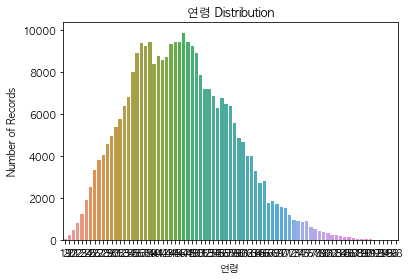

In [16]:
# 연령

column_name = '연령'
user_friendly_name = '연령'

#Get Details
get_column_details(df,column_name)

# 전체 Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 연령대 column

DataType:  category

There are no null values

Number of Unique Values:  9

Distribution of column:

40대       91043
30대       74047
50대       69369
60대       31564
20대       22765
70대        9382
80대        1678
80대 이상       94
10대          58
Name: 연령대, dtype: int64

-----------------------------------------------------

연령대 Distribution


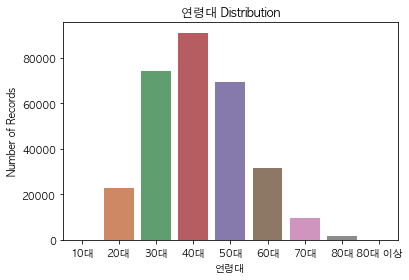


-----------------------------------------------------

연령대 & 고객구분 Distribution


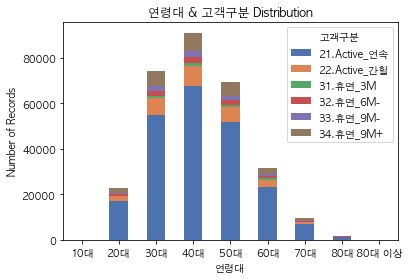

In [17]:
# 연령대

# 연속형 데이터 '연령'을 범주형 데이터 '연령대'로 labeling (pandas cut()함수 이용)
# '연령대'칼럼은 '연령'칼럼 앞에 value 모두 0으로 일단 삽입
df.insert(2,'연령대',[0 for x in range(300000)])
# 범주화
df['연령대'] = pd.cut(df['연령'],bins=[0,19,29,39,49,59,69,79,89,100],labels=['10대','20대','30대','40대','50대','60대','70대','80대','80대 이상'])


# # 내가 원하는대로 "연령대"column이 "연령"column 앞에 잘 추가되었나 확인
# df.iloc[:, 0:4]

column_name = '연령대'
user_friendly_name = '연령대'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# Stacked bar
column1 = column_name
column2 = '고객구분'
plot_stacked_bar(df,column1,column2,rotation=0)

Details of 탈회여부 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    178046
1    121954
Name: 탈회여부, dtype: int64

-----------------------------------------------------

탈회여부 Distribution


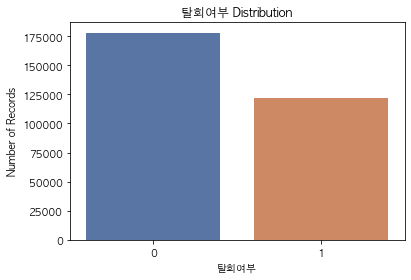

In [18]:
column_name = '탈회여부'
user_friendly_name = '탈회여부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 남녀구분코드 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    157932
2    142068
Name: 남녀구분코드, dtype: int64

-----------------------------------------------------

남녀구분코드 Distribution


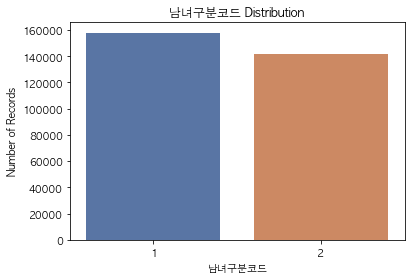

In [19]:
column_name = '남녀구분코드'
user_friendly_name = '남녀구분코드'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 소지여부_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    293922
0      6078
Name: 소지여부_신용, dtype: int64

-----------------------------------------------------

소지여부_신용 Distribution


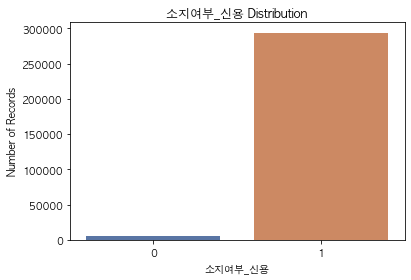

In [20]:
column_name = '소지여부_신용'
user_friendly_name = '소지여부_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 입회일자_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  8523

Distribution of column:

20070330    398
20180123    350
20171010    350
20180201    342
20180129    335
           ... 
19980922      1
19891220      1
20020427      1
19980410      1
19920411      1
Name: 입회일자_신용, Length: 8523, dtype: int64

-----------------------------------------------------

입회일자_신용 Distribution


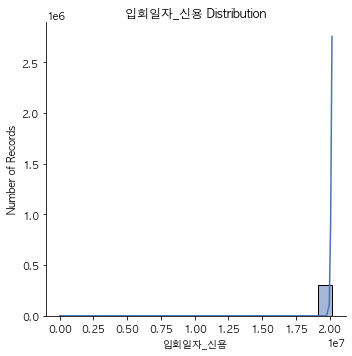

In [21]:
column_name = '입회일자_신용'
user_friendly_name = '입회일자_신용'

#Get Details
get_column_details(df,column_name)

# Displot
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 입회경과개월수_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  423

Distribution of column:

12     5866
10     5687
14     5234
13     5139
17     5116
       ... 
443       1
437       1
422       1
429       1
0         1
Name: 입회경과개월수_신용, Length: 423, dtype: int64

-----------------------------------------------------

입회경과개월수_신용 Distribution


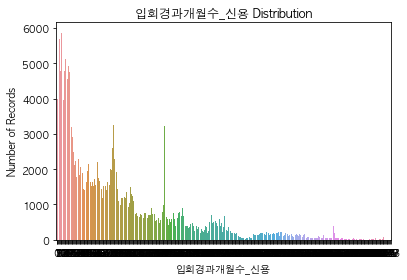

In [22]:
column_name = '입회경과개월수_신용'
user_friendly_name = '입회경과개월수_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 회원여부_연체 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    296097
1      3903
Name: 회원여부_연체, dtype: int64

-----------------------------------------------------

회원여부_연체 Distribution


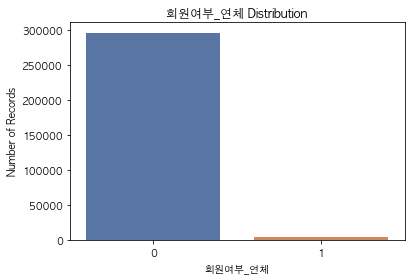

In [23]:
column_name = '회원여부_연체'
user_friendly_name = '회원여부_연체'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_TM column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    186041
1    113959
Name: 수신거부여부_TM, dtype: int64

-----------------------------------------------------

수신거부여부_TM Distribution


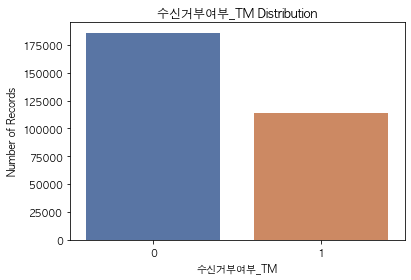

In [24]:
column_name = '수신거부여부_TM'
user_friendly_name = '수신거부여부_TM'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_DM column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    203088
1     96912
Name: 수신거부여부_DM, dtype: int64

-----------------------------------------------------

수신거부여부_DM Distribution


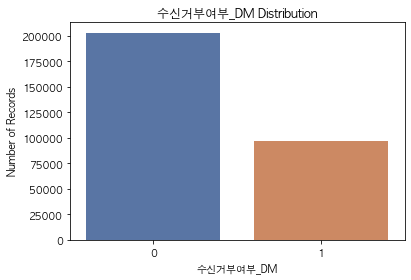

In [25]:
column_name = '수신거부여부_DM'
user_friendly_name = '수신거부여부_DM'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_메일 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    201866
1     98134
Name: 수신거부여부_메일, dtype: int64

-----------------------------------------------------

수신거부여부_메일 Distribution


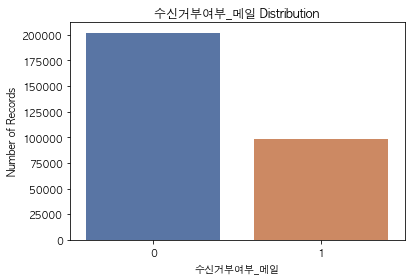

In [26]:
column_name = '수신거부여부_메일'
user_friendly_name = '수신거부여부_메일'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_SMS column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    187467
1    112533
Name: 수신거부여부_SMS, dtype: int64

-----------------------------------------------------

수신거부여부_SMS Distribution


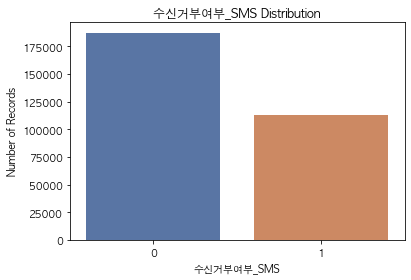

In [27]:
column_name = '수신거부여부_SMS'
user_friendly_name = '수신거부여부_SMS'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 자격기준 column

DataType:  object

There are no null values

Number of Unique Values:  13

Distribution of column:

06.기업체     79838
08.은행거래    78590
11.자영업자    62562
01.공무원     16083
02.교육기관    11310
04.의료기관    10215
12.체크전환    10166
99.기타       8921
10.배우자      7241
03.금융기관     6299
07.소기업      6284
09.전문직      1785
05.언론기관      706
Name: 자격기준, dtype: int64

-----------------------------------------------------

자격기준 Distribution


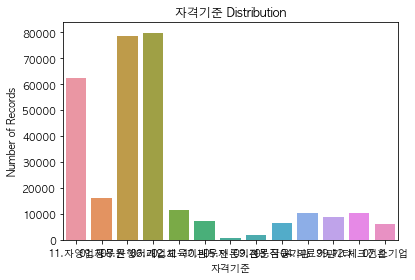

In [28]:
column_name = '자격기준'
user_friendly_name = '자격기준'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 자격구분상세 column

DataType:  object

There are no null values

Number of Unique Values:  44

Distribution of column:

08.은행거래_수신평잔                    61493
10.부동산보유                        35972
06.기업체_개인사업체임의단체연소득2.4천이상       24937
99.기타                           23101
06.기업체_납입자본금3억이상중소기업            20110
06.기업체_30대그룹계열사및상장법인            19073
06.기업체_납입자본금3억미만중소기업            13111
07.소기업                          12213
13.체크전환                         10166
01.공무원_일반                        8230
08.은행거래_부동산담보대출                  7925
11.배우자                           7241
01.공무원_정부투자공공기관                  6673
08.은행거래_신용대출                     6179
02.교육기관_초중고교사                    4840
04.의료기관_의료관련면허소시자                4113
04.의료기관                          3207
00.SK제휴사                         3099
14.사업소득                          3052
04.의료기관_의사약사한의사                  2895
03.금융기관_은행증권보험은행연합회              2662
06.기업체_코스닥등록기업                   2043
08.은행거래_급여이체                     2019


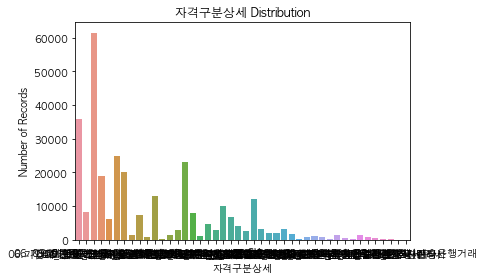

In [29]:
column_name = '자격구분상세'
user_friendly_name = '자격구분상세'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 연회비청구구분_B0M column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

4.미청구     274205
1.정상청구     19384
3.면제        5643
2.할인청구       768
Name: 연회비청구구분_B0M, dtype: int64

-----------------------------------------------------

연회비청구구분_B0M Distribution


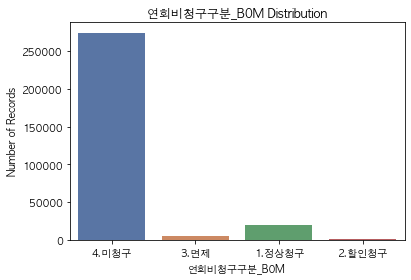

In [30]:
column_name = '연회비청구구분_B0M'
user_friendly_name = '연회비청구구분_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of BL여부_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    295761
1      4239
Name: BL여부_R12M, dtype: int64

-----------------------------------------------------

BL여부_R12M Distribution


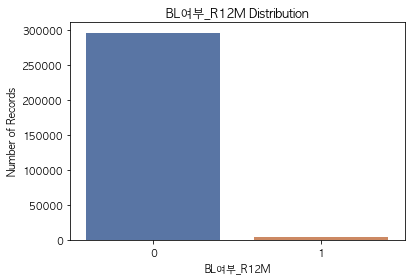

In [31]:
column_name = 'BL여부_R12M'
user_friendly_name = 'BL여부_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 탈회횟수_누적 column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     178046
1      94170
2      23184
3       3837
4        608
5        102
6         38
7         11
8          1
10         1
11         1
12         1
Name: 탈회횟수_누적, dtype: int64

-----------------------------------------------------

탈회횟수_누적 Distribution


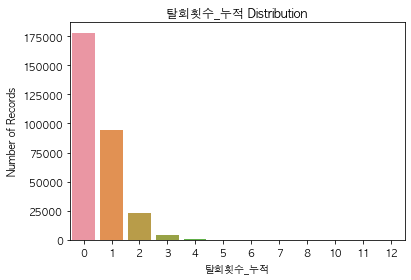

In [32]:
column_name = '탈회횟수_누적'
user_friendly_name = '탈회횟수_누적'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 탈회횟수_발급1년이내 column

DataType:  int64

There are no null values

Number of Unique Values:  10

Distribution of column:

0     280938
1      16597
2       1943
3        392
4         83
5         28
6         13
7          4
11         1
12         1
Name: 탈회횟수_발급1년이내, dtype: int64

-----------------------------------------------------

탈회횟수_발급1년이내 Distribution


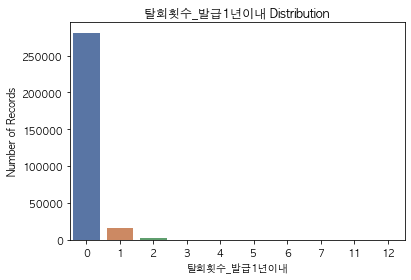

In [33]:
column_name = '탈회횟수_발급1년이내'
user_friendly_name = '탈회횟수_발급1년이내'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 거주시도명 column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

경기    83450
서울    83061
부산    17817
인천    16967
대전    16208
경남    12521
대구    11132
경북     9744
충남     9447
전북     7361
광주     7012
울산     6654
충북     5799
전남     5789
강원     4847
제주     2191
Name: 거주시도명, dtype: int64

-----------------------------------------------------

거주시도명 Distribution


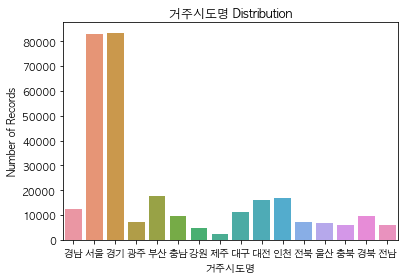

In [34]:
column_name = '거주시도명'
user_friendly_name = '거주시도명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 거주시군구명 column

DataType:  object

There are no null values

Number of Unique Values:  210

Distribution of column:

서구     11222
성남시     8388
용인시     8334
고양시     8306
수원시     7944
       ...  
울릉군       16
당진군        4
청원군        3
여주군        1
마산시        1
Name: 거주시군구명, Length: 210, dtype: int64

-----------------------------------------------------

거주시군구명 Distribution


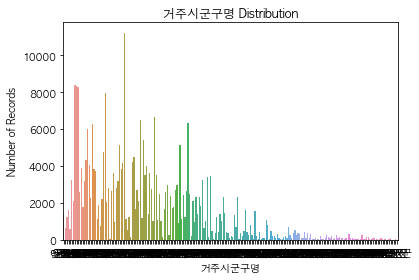

In [35]:
column_name = '거주시군구명'
user_friendly_name = '거주시군구명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 직장시도명 column

DataType:  object

There are  55665  null values

Number of Unique Values:  17

Distribution of column:

서울    81913
경기    55254
부산    13575
대전    11723
인천    11579
경남    10324
경북     9180
충남     8542
대구     8392
전북     6227
울산     5669
광주     5326
전남     5102
충북     5093
강원     4166
제주     1773
세종      497
Name: 직장시도명, dtype: int64

-----------------------------------------------------

직장시도명 Distribution


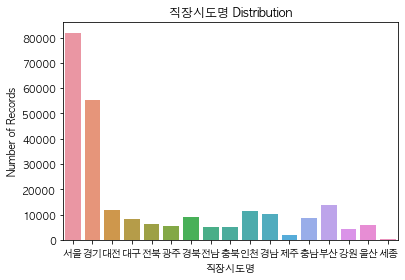

In [36]:
column_name = '직장시도명'
user_friendly_name = '직장시도명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 직장시군구명 column

DataType:  object

There are  56162  null values

Number of Unique Values:  209

Distribution of column:

중구      13237
강남구     12748
서구       7806
서초구      7150
성남시      6772
        ...  
울릉군        16
영양군        15
여주군         1
북제주군        1
청원군         1
Name: 직장시군구명, Length: 209, dtype: int64

-----------------------------------------------------

직장시군구명 Distribution


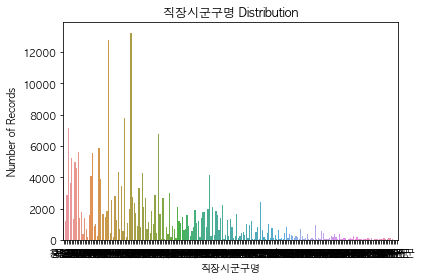

In [37]:
column_name = '직장시군구명'
user_friendly_name = '직장시군구명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 마케팅동의여부 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    240503
0     59497
Name: 마케팅동의여부, dtype: int64

-----------------------------------------------------

마케팅동의여부 Distribution


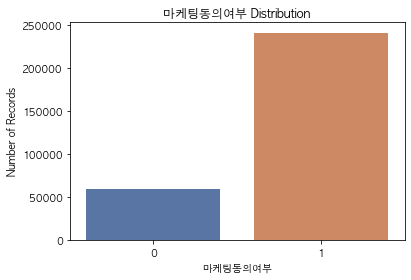

In [38]:
column_name = '마케팅동의여부'
user_friendly_name = '마케팅동의여부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 유효카드수_신용체크 column

DataType:  int64

There are no null values

Number of Unique Values:  28

Distribution of column:

1     117811
2      92065
3      47798
4      22736
5      10454
6       4895
7       2110
8        991
9        522
10       256
11       150
12        77
13        55
14        27
15        14
16        13
18         9
17         4
19         2
20         2
25         2
21         1
24         1
26         1
27         1
28         1
31         1
37         1
Name: 유효카드수_신용체크, dtype: int64

-----------------------------------------------------

유효카드수_신용체크 Distribution


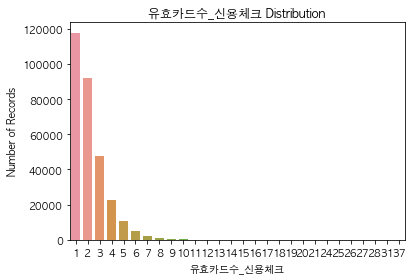

In [39]:
column_name = '유효카드수_신용체크'
user_friendly_name = '유효카드수_신용체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 유효카드수_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  23

Distribution of column:

1     183340
2      74630
3      22153
4       8256
0       6078
5       3300
6       1235
7        505
8        253
9        108
10        62
11        27
12        22
13        15
14         6
15         2
17         2
18         1
20         1
24         1
26         1
30         1
32         1
Name: 유효카드수_신용, dtype: int64

-----------------------------------------------------

유효카드수_신용 Distribution


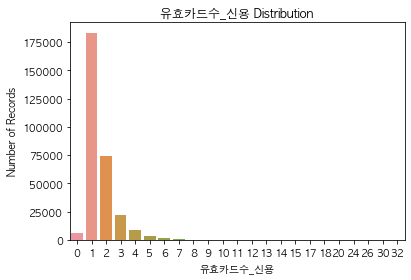

In [40]:
column_name = '유효카드수_신용'
user_friendly_name = '유효카드수_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 유효카드수_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  16

Distribution of column:

0     173989
1      84999
2      27281
3       8959
4       3061
5       1073
6        400
7        136
8         59
9         24
10         7
11         5
14         4
12         1
16         1
18         1
Name: 유효카드수_체크, dtype: int64

-----------------------------------------------------

유효카드수_체크 Distribution


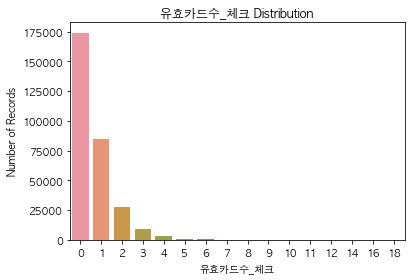

In [41]:
column_name = '유효카드수_체크'
user_friendly_name = '유효카드수_체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [42]:
column_name = '이용금액_R3M_신용체크'
user_friendly_name = '이용금액_R3M_신용체크'

#Get Details
get_column_details(df,column_name)



Details of 이용금액_R3M_신용체크 column

DataType:  int64

There are no null values

Number of Unique Values:  196913

Distribution of column:

0          45960
900         6398
1800        1667
2700        1462
600         1012
           ...  
2934210        1
3448265        1
1344970        1
822731         1
1576958        1
Name: 이용금액_R3M_신용체크, Length: 196913, dtype: int64


In [43]:
column_name = '이용금액_R3M_신용'
user_friendly_name = '이용금액_R3M_신용'

#Get Details
get_column_details(df,column_name)



Details of 이용금액_R3M_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  186521

Distribution of column:

0          51863
900         7364
1800        1891
2700        1635
600         1194
           ...  
2486247        1
5085160        1
4055370        1
1423340        1
1703650        1
Name: 이용금액_R3M_신용, Length: 186521, dtype: int64


In [44]:
column_name = '이용금액_R3M_체크'
user_friendly_name = '이용금액_R3M_체크'

#Get Details
get_column_details(df,column_name)



Details of 이용금액_R3M_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  38902

Distribution of column:

0          250898
10000         107
4500           96
30000          95
50000          81
            ...  
552020          1
130150          1
1162350         1
613490          1
1093610         1
Name: 이용금액_R3M_체크, Length: 38902, dtype: int64


In [45]:
column_name = '_1순위카드ID'
user_friendly_name = '_1순위카드ID'

#Get Details
get_column_details(df,column_name)



Details of _1순위카드ID column

DataType:  int64

There are no null values

Number of Unique Values:  1743

Distribution of column:

136     18737
156     17092
229     11856
1561     9769
126      9097
        ...  
362         1
620         1
1644        1
365         1
256         1
Name: _1순위카드ID, Length: 1743, dtype: int64


In [46]:
column_name = '_1순위카드이용금액'
user_friendly_name = '_1순위카드이용금액'

#Get Details
get_column_details(df,column_name)


Details of _1순위카드이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  181490

Distribution of column:

0          52030
900         9201
2700        2175
600         1235
300         1077
           ...  
851140         1
1369287        1
3980492        1
1334480        1
4724733        1
Name: _1순위카드이용금액, Length: 181490, dtype: int64


In [47]:
column_name = '_1순위카드이용건수'
user_friendly_name = '_1순위카드이용건수'

#Get Details
get_column_details(df,column_name)


Details of _1순위카드이용건수 column

DataType:  int64

There are no null values

Number of Unique Values:  572

Distribution of column:

0      52044
3      24766
1       7896
6       7710
2       6484
       ...  
574        1
478        1
596        1
477        1
511        1
Name: _1순위카드이용건수, Length: 572, dtype: int64


Details of _1순위신용체크구분 column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

신용    284204
체크     15796
Name: _1순위신용체크구분, dtype: int64

-----------------------------------------------------

_1순위신용체크구분 Distribution


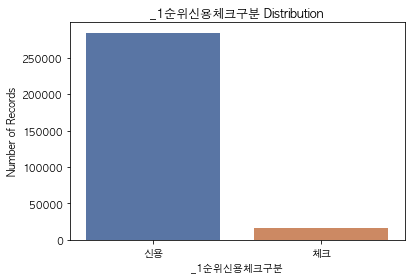

In [48]:
column_name = '_1순위신용체크구분'
user_friendly_name = '_1순위신용체크구분'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [49]:
column_name = '기본연회비_B0M'
user_friendly_name = '기본연회비_B0M'

#Get Details
get_column_details(df,column_name)


Details of 기본연회비_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  65

Distribution of column:

0         275303
5000        6767
10000       4754
8000        3545
12000       2356
           ...  
34000          1
90000          1
135000         1
200000         1
31000          1
Name: 기본연회비_B0M, Length: 65, dtype: int64


Details of Life_Stage column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

4.자녀성장기(1)    99160
5.자녀성장기(2)    74692
3.자녀출산기       30693
2.가족형성기       29736
7.노령          29532
6.자녀출가기       25365
1.Single      10822
Name: Life_Stage, dtype: int64

-----------------------------------------------------

Life_Stage Distribution


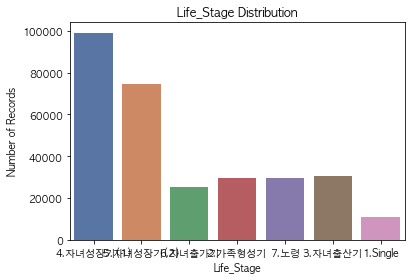

In [50]:
column_name = 'Life_Stage'
user_friendly_name = 'Life_Stage'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [51]:
column_name = '카드이용한도금액'
user_friendly_name = '카드이용한도금액'

#Get Details
get_column_details(df,column_name)


Details of 카드이용한도금액 column

DataType:  int64

There are no null values

Number of Unique Values:  426

Distribution of column:

1000000     35283
5000000     26726
3000000     20076
10000000    19889
0           12576
            ...  
33700000        1
98500000        1
35200000        1
4350000         1
86000000        1
Name: 카드이용한도금액, Length: 426, dtype: int64


Details of 고객구분 column

DataType:  object

There are no null values

Number of Unique Values:  6

Distribution of column:

21.Active_연속    222863
22.Active_간헐     29035
34.휴면_9M+        26974
32.휴면_6M-         8951
33.휴면_9M-         7638
31.휴면_3M          4539
Name: 고객구분, dtype: int64

-----------------------------------------------------

고객구분 Distribution


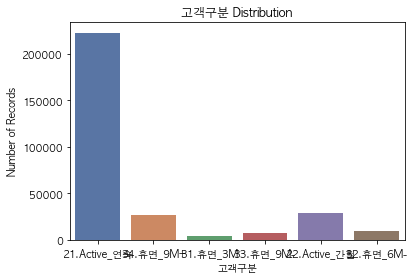

In [52]:
column_name = '고객구분'
user_friendly_name = '고객구분'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [53]:
column_name = '이용건수_신판_B0M'
user_friendly_name = '이용건수_신판_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_신판_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  271

Distribution of column:

0      63342
1      38614
2      15407
3      10361
4       8272
       ...  
295        1
236        1
237        1
209        1
350        1
Name: 이용건수_신판_B0M, Length: 271, dtype: int64


In [54]:
column_name = '이용건수_일시불_B0M'
user_friendly_name = '이용건수_일시불_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_일시불_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  268

Distribution of column:

0      65083
1      39314
2      15368
3      10244
4       8345
       ...  
229        1
230        1
262        1
264        1
351        1
Name: 이용건수_일시불_B0M, Length: 268, dtype: int64


Details of 이용건수_할부_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  47

Distribution of column:

 0     252108
 1      25742
 2      10180
 3       4842
 4       2555
 5       1487
 6        865
-1        700
 7        501
 8        280
 9        187
 10       128
 11        80
-2         80
 12        50
 13        44
-3         27
 15        22
 14        18
 16        10
 18        10
-4         10
 23         8
 19         7
-5          6
-6          6
 17         5
 20         5
 22         4
 24         4
 25         4
 29         3
-7          3
-8          2
-9          2
 28         2
 32         2
 21         2
 70         1
-14         1
 64         1
 41         1
 40         1
 37         1
 33         1
 27         1
 67         1
Name: 이용건수_할부_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_B0M Distribution


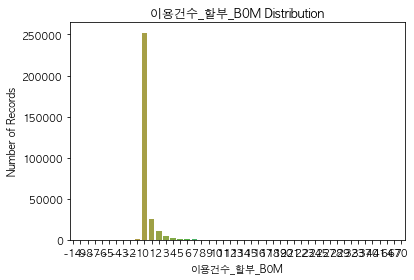

In [55]:
column_name = '이용건수_할부_B0M'
user_friendly_name = '이용건수_할부_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_할부_유이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  27

Distribution of column:

 0     281472
 1      12436
 2       3277
 3       1231
 4        507
-1        497
 5        227
 6        115
-2         62
 7         60
 8         37
-3         21
 9         17
 10        13
 11         6
-4          5
 13         3
 12         3
-6          2
 15         2
 24         1
 29         1
-61         1
-8          1
-5          1
 14         1
 20         1
Name: 이용건수_할부_유이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_유이자_B0M Distribution


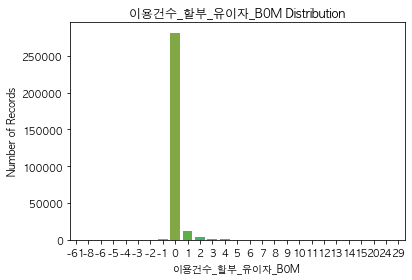

In [56]:
column_name = '이용건수_할부_유이자_B0M'
user_friendly_name = '이용건수_할부_유이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_할부_무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  48

Distribution of column:

 0     263495
 1      20974
 2       7401
 3       3301
 4       1681
 5        935
-1        677
 6        540
 7        285
 8        183
 9        109
 10        83
-2         77
 11        47
 12        42
-3         24
 13        24
 15        18
 14        16
-4         11
 18        10
 23         6
 16         6
 20         5
 17         5
-5          5
 22         4
-6          4
-7          3
 24         3
 19         3
 21         3
-9          2
 25         2
 29         2
-8          2
 33         1
 27         1
 31         1
 32         1
-10         1
-14         1
 69         1
 67         1
 64         1
 41         1
 40         1
 28         1
Name: 이용건수_할부_무이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_무이자_B0M Distribution


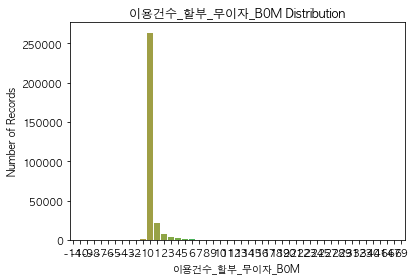

In [57]:
column_name = '이용건수_할부_무이자_B0M'
user_friendly_name = '이용건수_할부_무이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_부분무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  10

Distribution of column:

 0     299427
 1        451
 2         61
-1         29
 3         21
 4          5
-2          3
 5          1
 6          1
 61         1
Name: 이용건수_부분무이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_부분무이자_B0M Distribution


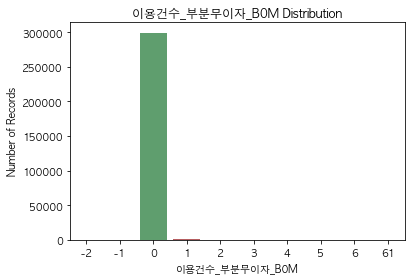

In [58]:
column_name = '이용건수_부분무이자_B0M'
user_friendly_name = '이용건수_부분무이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_CA_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  21

Distribution of column:

0     284877
1       9163
2       3459
3       1360
4        574
5        280
6        131
7         57
8         38
9         17
10        15
11         9
12         7
15         4
13         2
14         2
16         1
18         1
20         1
24         1
25         1
Name: 이용건수_CA_B0M, dtype: int64

-----------------------------------------------------

이용건수_CA_B0M Distribution


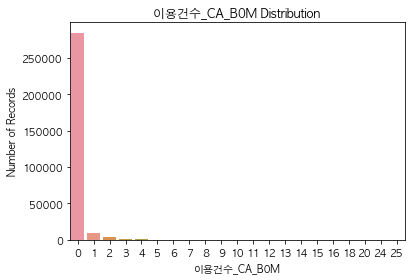

In [59]:
column_name = '이용건수_CA_B0M'
user_friendly_name = '이용건수_CA_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [60]:
column_name = '이용건수_체크_B0M'
user_friendly_name = '이용건수_체크_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_체크_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  191

Distribution of column:

0      259808
1        5588
2        3168
3        2187
4        1744
        ...  
145         1
140         1
282         1
131         1
348         1
Name: 이용건수_체크_B0M, Length: 191, dtype: int64


Details of 이용건수_카드론_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    297998
1      1756
2       202
3        23
4        11
6         4
5         3
7         3
Name: 이용건수_카드론_B0M, dtype: int64

-----------------------------------------------------

이용건수_카드론_B0M Distribution


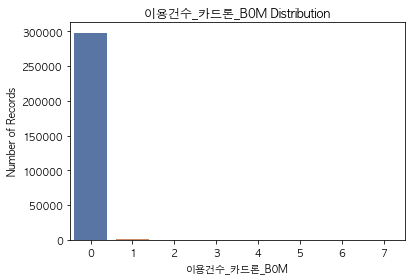

In [61]:
column_name = '이용건수_카드론_B0M'
user_friendly_name = '이용건수_카드론_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [62]:
column_name = '이용금액_신용_B0M'
user_friendly_name = '이용금액_신용_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_신용_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  141163

Distribution of column:

0          62014
300        15096
900         2868
1000         755
3300         384
           ...  
1414610        1
353740         1
1932698        1
345544         1
1052670        1
Name: 이용금액_신용_B0M, Length: 141163, dtype: int64


In [63]:
column_name = '이용금액_신판_B0M'
user_friendly_name = '이용금액_신판_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_신판_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  137377

Distribution of column:

0          63240
300        15298
900         2976
1000         759
3300         399
           ...  
773466         1
10110          1
662880         1
18290          1
1052670        1
Name: 이용금액_신판_B0M, Length: 137377, dtype: int64


In [64]:
column_name = '이용금액_일시불_B0M'
user_friendly_name = '이용금액_일시불_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_일시불_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  129357

Distribution of column:

0          65047
300        15563
900         3119
1000         769
3300         430
           ...  
530785         1
4448           1
1175900        1
641371         1
1052670        1
Name: 이용금액_일시불_B0M, Length: 129357, dtype: int64


In [65]:
column_name = '이용금액_할부_B0M'
user_friendly_name = '이용금액_할부_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  26005

Distribution of column:

0          251326
300000        412
200000        228
100000        215
500000        202
            ...  
1796400         1
661790          1
149780          1
190720          1
5881800         1
Name: 이용금액_할부_B0M, Length: 26005, dtype: int64


In [66]:
column_name = '이용금액_할부_유이자_B0M'
user_friendly_name = '이용금액_할부_유이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_유이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  9282

Distribution of column:

0         281303
300000       364
200000       184
500000       182
100000       168
           ...  
992447         1
89200          1
64580          1
52290          1
450340         1
Name: 이용금액_할부_유이자_B0M, Length: 9282, dtype: int64


In [67]:
column_name = '이용금액_할부_무이자_B0M'
user_friendly_name = '이용금액_할부_무이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  20932

Distribution of column:

0         262696
99000        207
100000       146
300000       145
79000        140
           ...  
990910         1
995000         1
949906         1
85620          1
122820         1
Name: 이용금액_할부_무이자_B0M, Length: 20932, dtype: int64


In [68]:
column_name = '이용금액_부분무이자_B0M'
user_friendly_name = '이용금액_부분무이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_부분무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  551

Distribution of column:

0          299406
1500000         5
1000000         5
990000          4
880000          4
            ...  
206640          1
172800          1
1171560         1
2305590         1
307050          1
Name: 이용금액_부분무이자_B0M, Length: 551, dtype: int64


In [69]:
column_name = '이용금액_CA_B0M'
user_friendly_name = '이용금액_CA_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_CA_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  768

Distribution of column:

0          284877
2000000       848
1000000       842
200000        757
300000        724
            ...  
1110060         1
29336           1
4240000         1
3780000         1
769928          1
Name: 이용금액_CA_B0M, Length: 768, dtype: int64


In [70]:
column_name = '이용금액_체크_B0M'
user_friendly_name = '이용금액_체크_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_체크_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  28930

Distribution of column:

0          259781
4500          105
10000          98
900            93
20000          89
            ...  
114762          1
894440          1
796120          1
1353160         1
20470           1
Name: 이용금액_체크_B0M, Length: 28930, dtype: int64


In [71]:
column_name = '이용금액_카드론_B0M'
user_friendly_name = '이용금액_카드론_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_카드론_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  400

Distribution of column:

0           297998
5000000        199
2000000        150
1000000        111
3000000         89
             ...  
8150000          1
550000           1
20900000         1
13300000         1
12930000         1
Name: 이용금액_카드론_B0M, Length: 400, dtype: int64


Details of 이용후경과월_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     237508
12     24932
1       8844
2       5546
3       4539
4       3309
5       2951
6       2691
7       2394
8       2038
9       1832
10      1790
11      1626
Name: 이용후경과월_신용, dtype: int64

-----------------------------------------------------

이용후경과월_신용 Distribution


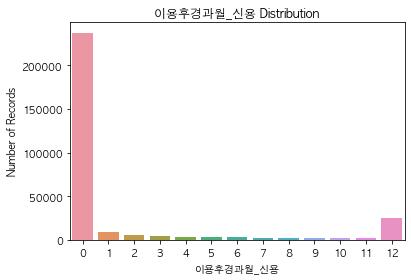

In [72]:
column_name = '이용후경과월_신용'
user_friendly_name = '이용후경과월_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_신판 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     237508
12     24932
1       8844
2       5546
3       4539
4       3309
5       2951
6       2691
7       2394
8       2038
9       1832
10      1790
11      1626
Name: 이용후경과월_신판, dtype: int64

-----------------------------------------------------

이용후경과월_신판 Distribution


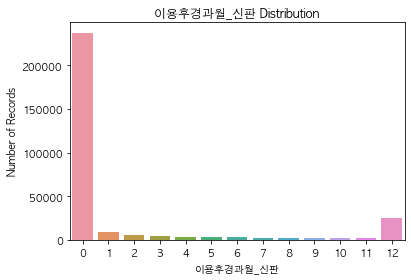

In [73]:
column_name = '이용후경과월_신판'
user_friendly_name = '이용후경과월_신판'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_일시불 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     234417
12     26643
1       9298
2       5820
3       4782
4       3474
5       3015
6       2739
7       2436
8       2019
9       1868
10      1828
11      1661
Name: 이용후경과월_일시불, dtype: int64

-----------------------------------------------------

이용후경과월_일시불 Distribution


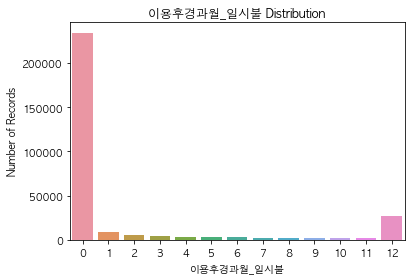

In [74]:
column_name = '이용후경과월_일시불'
user_friendly_name = '이용후경과월_일시불'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    158848
0      47672
1      20898
2      13812
3       9651
4       7934
5       7592
6       6824
7       6269
8       5595
9       5308
11      4990
10      4607
Name: 이용후경과월_할부, dtype: int64

-----------------------------------------------------

이용후경과월_할부 Distribution


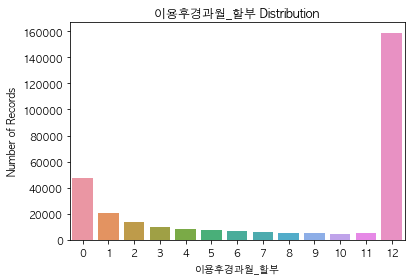

In [75]:
column_name = '이용후경과월_할부'
user_friendly_name = '이용후경과월_할부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부_유이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    229098
0      17995
1      10717
2       8320
3       6209
4       5482
5       5421
11      3145
6       2958
7       2792
9       2751
8       2668
10      2444
Name: 이용후경과월_할부_유이자, dtype: int64

-----------------------------------------------------

이용후경과월_할부_유이자 Distribution


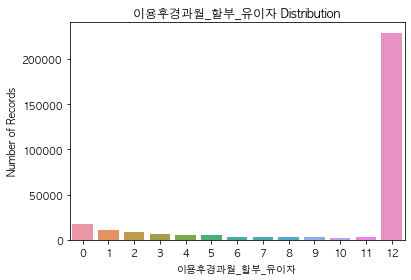

In [76]:
column_name = '이용후경과월_할부_유이자'
user_friendly_name = '이용후경과월_할부_유이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부_무이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    172110
0      36354
1      17660
2      12183
3       9065
6       8373
7       7402
4       7334
5       7219
8       6447
9       5844
11      5119
10      4890
Name: 이용후경과월_할부_무이자, dtype: int64

-----------------------------------------------------

이용후경과월_할부_무이자 Distribution


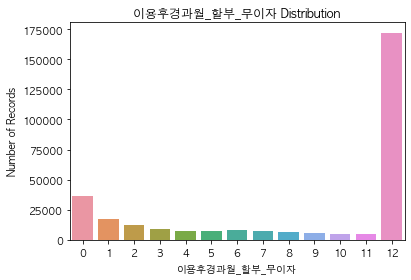

In [77]:
column_name = '이용후경과월_할부_무이자'
user_friendly_name = '이용후경과월_할부_무이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_부분무이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    293858
9        613
6        579
7        573
8        568
0        566
11       551
1        537
2        508
10       446
5        438
4        395
3        368
Name: 이용후경과월_부분무이자, dtype: int64

-----------------------------------------------------

이용후경과월_부분무이자 Distribution


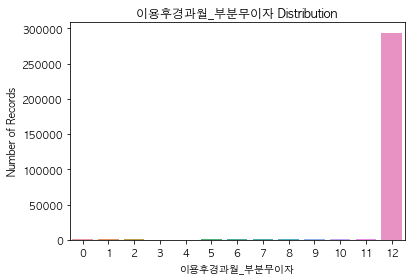

In [78]:
column_name = '이용후경과월_부분무이자'
user_friendly_name = '이용후경과월_부분무이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_CA column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    258679
0      15123
1       5328
2       3593
3       2531
4       2419
5       2202
6       2021
7       1908
8       1706
9       1586
11      1545
10      1359
Name: 이용후경과월_CA, dtype: int64

-----------------------------------------------------

이용후경과월_CA Distribution


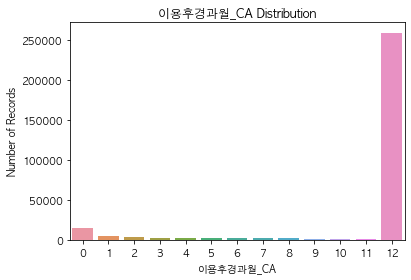

In [79]:
column_name = '이용후경과월_CA'
user_friendly_name = '이용후경과월_CA'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    231938
0      40120
1       5764
2       4034
3       3036
4       2573
5       2416
6       2006
7       1866
8       1684
9       1602
10      1492
11      1469
Name: 이용후경과월_체크, dtype: int64

-----------------------------------------------------

이용후경과월_체크 Distribution


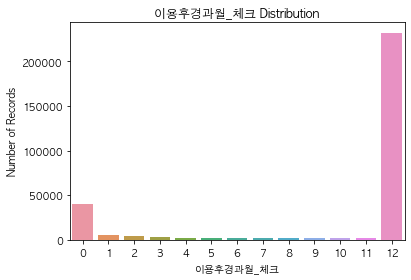

In [80]:
column_name = '이용후경과월_체크'
user_friendly_name = '이용후경과월_체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_카드론 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    280005
2       2141
1       2094
0       2002
4       1644
3       1614
5       1574
6       1540
7       1532
11      1532
8       1506
10      1439
9       1377
Name: 이용후경과월_카드론, dtype: int64

-----------------------------------------------------

이용후경과월_카드론 Distribution


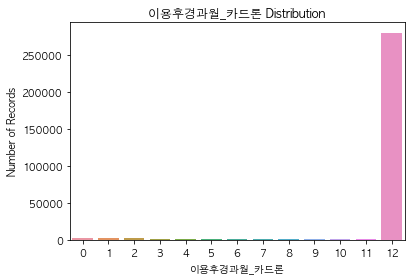

In [81]:
column_name = '이용후경과월_카드론'
user_friendly_name = '이용후경과월_카드론'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용건수_신용_R12M'
user_friendly_name = '이용건수_신용_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_신용_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2066

Distribution of column:

0       25015
12       9693
1        4387
2        3120
13       2771
        ...  
1691        1
1946        1
1690        1
1944        1
1791        1
Name: 이용건수_신용_R12M, Length: 2066, dtype: int64

-----------------------------------------------------

이용건수_신용_R12M Distribution


In [ ]:
column_name = '이용건수_신판_R12M'
user_friendly_name = '이용건수_신판_R12M'

#Get Details
get_column_details(df,column_name)


In [ ]:
column_name = '이용건수_일시불_R12M'
user_friendly_name = '이용건수_일시불_R12M'

#Get Details
get_column_details(df,column_name)


In [ ]:
column_name = '이용건수_할부_R12M'
user_friendly_name = '이용건수_할부_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_유이자_R12M'
user_friendly_name = '이용건수_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_무이자_R12M'
user_friendly_name = '이용건수_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_부분무이자_R12M'
user_friendly_name = '이용건수_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_CA_R12M'
user_friendly_name = '이용건수_CA_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_체크_R12M'
user_friendly_name = '이용건수_체크_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_카드론_R12M'
user_friendly_name = '이용건수_카드론_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신용_R12M'
user_friendly_name = '이용금액_신용_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신판_R12M'
user_friendly_name = '이용금액_신판_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_일시불_R12M'
user_friendly_name = '이용금액_일시불_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_R12M'
user_friendly_name = '이용금액_할부_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_유이자_R12M'
user_friendly_name = '이용금액_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_무이자_R12M'
user_friendly_name = '이용금액_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_부분무이자_R12M'
user_friendly_name = '이용금액_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_CA_R12M'
user_friendly_name = '이용금액_CA_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_체크_R12M'
user_friendly_name = '이용금액_체크_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_카드론_R12M'
user_friendly_name = '이용금액_카드론_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용개월수_신용_R12M'
user_friendly_name = '이용개월수_신용_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_신판_R12M'
user_friendly_name = '이용개월수_신판_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_일시불_R12M'
user_friendly_name = '이용개월수_일시불_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_R12M'
user_friendly_name = '이용개월수_할부_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_유이자_R12M'
user_friendly_name = '이용개월수_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_무이자_R12M'
user_friendly_name = '이용개월수_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_부분무이자_R12M'
user_friendly_name = '이용개월수_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_CA_R12M'
user_friendly_name = '이용개월수_CA_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_체크_R12M'
user_friendly_name = '이용개월수_체크_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_카드론_R12M'
user_friendly_name = '이용개월수_카드론_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용건수_신용_R6M'
user_friendly_name = '이용건수_신용_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_신판_R6M'
user_friendly_name = '이용건수_신판_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_일시불_R6M'
user_friendly_name = '이용건수_일시불_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_R6M'
user_friendly_name = '이용건수_할부_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_유이자_R6M'
user_friendly_name = '이용건수_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_무이자_R6M'
user_friendly_name = '이용건수_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_CA_R6M'
user_friendly_name = '이용건수_CA_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_체크_R6M'
user_friendly_name = '이용건수_체크_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_카드론_R6M'
user_friendly_name = '이용건수_카드론_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신용_R6M'
user_friendly_name = '이용금액_신용_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신판_R6M'
user_friendly_name = '이용금액_신판_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_일시불_R6M'
user_friendly_name = '이용금액_일시불_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_R6M'
user_friendly_name = '이용금액_할부_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_유이자_R6M'
user_friendly_name = '이용금액_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_무이자_R6M'
user_friendly_name = '이용금액_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_부분무이자_R6M'
user_friendly_name = '이용금액_부분무이자_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_CA_R6M'
user_friendly_name = '이용금액_CA_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_체크_R6M'
user_friendly_name = '이용금액_체크_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_카드론_R6M'
user_friendly_name = '이용금액_카드론_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용개월수_신용_R6M'
user_friendly_name = '이용개월수_신용_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_신판_R6M'
user_friendly_name = '이용개월수_신판_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_일시불_R6M'
user_friendly_name = '이용개월수_일시불_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_R6M'
user_friendly_name = '이용개월수_할부_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_유이자_R6M'
user_friendly_name = '이용개월수_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_무이자_R6M'
user_friendly_name = '이용개월수_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_부분무이자_R6M'
user_friendly_name = '이용개월수_부분무이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_CA_R6M'
user_friendly_name = '이용개월수_CA_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_체크_R6M'
user_friendly_name = '이용개월수_체크_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_카드론_R6M'
user_friendly_name = '이용개월수_카드론_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용건수_신용_R3M'
user_friendly_name = '이용건수_신용_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_신판_R3M'
user_friendly_name = '이용건수_신판_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_일시불_R3M'
user_friendly_name = '이용건수_일시불_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_R3M'
user_friendly_name = '이용건수_할부_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_유이자_R3M'
user_friendly_name = '이용건수_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_할부_무이자_R3M'
user_friendly_name = '이용건수_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_부분무이자_R3M'
user_friendly_name = '이용건수_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_CA_R3M'
user_friendly_name = '이용건수_CA_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_체크_R3M'
user_friendly_name = '이용건수_체크_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_카드론_R3M'
user_friendly_name = '이용건수_카드론_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신용_R3M'
user_friendly_name = '이용금액_신용_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_신판_R3M'
user_friendly_name = '이용금액_신판_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_일시불_R3M'
user_friendly_name = '이용금액_일시불_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_R3M'
user_friendly_name = '이용금액_할부_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_유이자_R3M'
user_friendly_name = '이용금액_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_할부_무이자_R3M'
user_friendly_name = '이용금액_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_부분무이자_R3M'
user_friendly_name = '이용금액_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_CA_R3M'
user_friendly_name = '이용금액_CA_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_체크_R3M'
user_friendly_name = '이용금액_체크_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_카드론_R3M'
user_friendly_name = '이용금액_카드론_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용개월수_신용_R3M'
user_friendly_name = '이용개월수_신용_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_신판_R3M'
user_friendly_name = '이용개월수_신판_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_일시불_R3M'
user_friendly_name = '이용개월수_일시불_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_R3M'
user_friendly_name = '이용개월수_할부_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_유이자_R3M'
user_friendly_name = '이용개월수_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_할부_무이자_R3M'
user_friendly_name = '이용개월수_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_부분무이자_R3M'
user_friendly_name = '이용개월수_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_CA_R3M'
user_friendly_name = '이용개월수_CA_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_체크_R3M'
user_friendly_name = '이용개월수_체크_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_카드론_R3M'
user_friendly_name = '이용개월수_카드론_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용가맹점수'
user_friendly_name = '이용가맹점수'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_업종기준'
user_friendly_name = '이용금액_업종기준'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_쇼핑'
user_friendly_name = '이용금액_쇼핑'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_요식'
user_friendly_name = '이용금액_요식'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_교통'
user_friendly_name = '이용금액_교통'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_의료'
user_friendly_name = '이용금액_의료'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_납부'
user_friendly_name = '이용금액_납부'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_교육'
user_friendly_name = '이용금액_교육'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_여유생활'
user_friendly_name = '이용금액_여유생활'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_사교활동'
user_friendly_name = '이용금액_사교활동'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_일상생활'
user_friendly_name = '이용금액_일상생활'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용금액_해외'
user_friendly_name = '이용금액_해외'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_도소매_이용금액'
user_friendly_name = '쇼핑_도소매_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_백화점_이용금액'
user_friendly_name = '쇼핑_백화점_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_마트_이용금액'
user_friendly_name = '쇼핑_마트_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_슈퍼마켓_이용금액'
user_friendly_name = '쇼핑_슈퍼마켓_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_편의점_이용금액'
user_friendly_name = '쇼핑_편의점_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_아울렛_이용금액'
user_friendly_name = '쇼핑_아울렛_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_온라인_이용금액'
user_friendly_name = '쇼핑_온라인_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_기타_이용금액'
user_friendly_name = '쇼핑_기타_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '쇼핑_전체_이용금액'
user_friendly_name = '쇼핑_전체_이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_주유이용금액'
user_friendly_name = '교통_주유이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_정비이용금액'
user_friendly_name = '교통_정비이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_통행료이용금액'
user_friendly_name = '교통_통행료이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_버스지하철이용금액'
user_friendly_name = '교통_버스지하철이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_택시이용금액'
user_friendly_name = '교통_택시이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_철도버스이용금액'
user_friendly_name = '교통_철도버스이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '교통_전체이용금액'
user_friendly_name = '교통_전체이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_운동이용금액'
user_friendly_name = '여유_운동이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_Pet이용금액'
user_friendly_name = '여유_Pet이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_공연이용금액'
user_friendly_name = '여유_공연이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_공원이용금액'
user_friendly_name = '여유_공원이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_숙박이용금액'
user_friendly_name = '여유_숙박이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_여행이용금액'
user_friendly_name = '여유_여행이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_항공이용금액'
user_friendly_name = '여유_항공이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_기타이용금액'
user_friendly_name = '여유_기타이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '여유_전체이용금액'
user_friendly_name = '여유_전체이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_통신비이용금액'
user_friendly_name = '납부_통신비이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_관리비이용금액'
user_friendly_name = '납부_관리비이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_렌탈료이용금액'
user_friendly_name = '납부_렌탈료이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_가스전기료이용금액'
user_friendly_name = '납부_가스전기료이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_보험료이용금액'
user_friendly_name = '납부_보험료이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_유선방송이용금액'
user_friendly_name = '납부_유선방송이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_건강연금이용금액'
user_friendly_name = '납부_건강연금이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_기타이용금액'
user_friendly_name = '납부_기타이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '납부_전체이용금액'
user_friendly_name = '납부_전체이용금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할부건수_3M_R12M'
user_friendly_name = '할부건수_3M_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할부건수_6M_R12M'
user_friendly_name = '할부건수_6M_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할부건수_12M_R12M'
user_friendly_name = '할부건수_12M_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = 'RP건수_B0M'
user_friendly_name = 'RP건수_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = 'RP금액_B0M'
user_friendly_name = 'RP금액_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '증감_RP건수_전월'
user_friendly_name = '증감_RP건수_전월'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '증감_RP유형건수_전월'
user_friendly_name = '증감_RP유형건수_전월'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_온라인_R6M'
user_friendly_name = '이용개월수_온라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_오프라인_R6M'
user_friendly_name = '이용개월수_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용건수_오프라인_R6M'
user_friendly_name = '이용건수_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_온라인_B0M'
user_friendly_name = '이용건수_온라인_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_오프라인_B0M'
user_friendly_name = '이용건수_오프라인_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용개월수_페이_온라인_R6M'
user_friendly_name = '이용개월수_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_페이_오프라인_R6M'
user_friendly_name = '이용개월수_페이_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용금액_페이_온라인_R6M'
user_friendly_name = '이용금액_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_페이_온라인_R6M'
user_friendly_name = '이용건수_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_페이_오프라인_R6M'
user_friendly_name = '이용건수_페이_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_페이_오프라인_R3M'
user_friendly_name = '이용건수_페이_오프라인_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_페이_온라인_B0M'
user_friendly_name = '이용건수_페이_온라인_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용건수_페이_오프라인_B0M'
user_friendly_name = '이용건수_페이_오프라인_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '이용개월수_간편결제_R6M'
user_friendly_name = '이용개월수_간편결제_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)



In [ ]:
column_name = '이용개월수_전체_R6M'
user_friendly_name = '이용개월수_전체_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_전체_R3M'
user_friendly_name = '이용개월수_전체_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용개월수_결제일_R6M'
user_friendly_name = '이용개월수_결제일_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '이용금액대'
user_friendly_name = '이용금액대'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '청구금액_R3M'
user_friendly_name = '청구금액_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '청구금액_R6M'
user_friendly_name = '청구금액_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할인건수_R3M'
user_friendly_name = '할인건수_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할인금액_R3M'
user_friendly_name = '할인금액_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할인건수_B0M'
user_friendly_name = '할인건수_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '할인금액_B0M'
user_friendly_name = '할인금액_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '상환개월수_R12M'
user_friendly_name = '상환개월수_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '상환개월수_결제일_R12M'
user_friendly_name = '상환개월수_결제일_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '상환개월수_결제일_R6M'
user_friendly_name = '상환개월수_결제일_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '상환개월수_결제일_R3M'
user_friendly_name = '상환개월수_결제일_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '연체건수_R12M'
user_friendly_name = '연체건수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '연체건수_R6M'
user_friendly_name = '연체건수_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '연체건수_R3M'
user_friendly_name = '연체건수_R3M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '혜택수혜금액'
user_friendly_name = '혜택수혜금액'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_TM_B0M'
user_friendly_name = '컨택건수_카드론_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_TM_B0M'
user_friendly_name = '컨택건수_리볼빙_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_TM_B0M'
user_friendly_name = '컨택건수_CA_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_TM_B0M'
user_friendly_name = '컨택건수_이용유도_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_신용발급_TM_B0M'
user_friendly_name = '컨택건수_신용발급_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_부대서비스_TM_B0M'
user_friendly_name = '컨택건수_부대서비스_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_포인트소진_TM_B0M'
user_friendly_name = '컨택건수_포인트소진_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_보험_TM_B0M'
user_friendly_name = '컨택건수_보험_TM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_LMS_B0M'
user_friendly_name = '컨택건수_카드론_LMS_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_LMS_B0M'
user_friendly_name = '컨택건수_CA_LMS_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_LMS_B0M'
user_friendly_name = '컨택건수_리볼빙_LMS_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_LMS_B0M'
user_friendly_name = '컨택건수_이용유도_LMS_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_EM_B0M'
user_friendly_name = '컨택건수_카드론_EM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_EM_B0M'
user_friendly_name = '컨택건수_CA_EM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_EM_B0M'
user_friendly_name = '컨택건수_리볼빙_EM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_EM_B0M'
user_friendly_name = '컨택건수_이용유도_EM_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_청구서_B0M'
user_friendly_name = '컨택건수_카드론_청구서_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_청구서_B0M'
user_friendly_name = '컨택건수_CA_청구서_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_청구서_B0M'
user_friendly_name = '컨택건수_리볼빙_청구서_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_청구서_B0M'
user_friendly_name = '컨택건수_이용유도_청구서_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_인터넷_B0M'
user_friendly_name = '컨택건수_카드론_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_인터넷_B0M'
user_friendly_name = '컨택건수_CA_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_인터넷_B0M'
user_friendly_name = '컨택건수_리볼빙_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_인터넷_B0M'
user_friendly_name = '컨택건수_이용유도_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_TM_R6M'
user_friendly_name = '컨택건수_카드론_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_TM_R6M'
user_friendly_name = '컨택건수_리볼빙_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_TM_R6M'
user_friendly_name = '컨택건수_CA_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_TM_R6M'
user_friendly_name = '컨택건수_이용유도_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_신용발급_TM_R6M'
user_friendly_name = '컨택건수_신용발급_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_부대서비스_TM_R6M'
user_friendly_name = '컨택건수_부대서비스_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_포인트소진_TM_R6M'
user_friendly_name = '컨택건수_포인트소진_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_보험_TM_R6M'
user_friendly_name = '컨택건수_보험_TM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_LMS_R6M'
user_friendly_name = '컨택건수_카드론_LMS_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_LMS_R6M'
user_friendly_name = '컨택건수_CA_LMS_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_LMS_R6M'
user_friendly_name = '컨택건수_리볼빙_LMS_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_LMS_R6M'
user_friendly_name = '컨택건수_이용유도_LMS_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_EM_R6M'
user_friendly_name = '컨택건수_카드론_EM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_EM_R6M'
user_friendly_name = '컨택건수_CA_EM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_EM_R6M'
user_friendly_name = '컨택건수_리볼빙_EM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_EM_R6M'
user_friendly_name = '컨택건수_이용유도_EM_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_청구서_R6M'
user_friendly_name = '컨택건수_카드론_청구서_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_청구서_R6M'
user_friendly_name = '컨택건수_CA_청구서_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_청구서_R6M'
user_friendly_name = '컨택건수_리볼빙_청구서_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_이용유도_청구서_R6M'
user_friendly_name = '컨택건수_이용유도_청구서_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_카드론_인터넷_R6M'
user_friendly_name = '컨택건수_카드론_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_CA_인터넷_R6M'
user_friendly_name = '컨택건수_CA_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_리볼빙_인터넷_R6M'
user_friendly_name = '컨택건수_리볼빙_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_채권_B0M'
user_friendly_name = '컨택건수_채권_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_FDS_B0M'
user_friendly_name = '컨택건수_FDS_B0M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_채권_R6M'
user_friendly_name = '컨택건수_채권_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '컨택건수_FDS_R6M'
user_friendly_name = '컨택건수_FDS_R6M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '캠페인접촉건수_R12M'
user_friendly_name = '캠페인접촉건수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '캠페인접촉일수_R12M'
user_friendly_name = '캠페인접촉일수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '캠페인접촉월수_R12M'
user_friendly_name = '캠페인접촉월수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '접촉후경과월_R12M'
user_friendly_name = '접촉후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '보험콜대상월수_R12M'
user_friendly_name = '보험콜대상월수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '보험콜대상횟수_R12M'
user_friendly_name = '보험콜대상횟수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '보험콜통화횟수_R12M'
user_friendly_name = '보험콜통화횟수_R12M'

#Get Details
get_column_details(df,column_name)

In [ ]:
column_name = '보험콜배정후경과월_R12M'
user_friendly_name = '보험콜배정후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
column_name = '보험콜통화후경과월_R12M'
user_friendly_name = '보험콜통화후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)